## Matplotlib for Bitcoins Report

In [1]:
# Extracting data from the website
import pandas as pd
url='https://ycharts.com/indicators/bitcoin_price#:~:text=Bitcoin%20Price%20is%20at%20a,314.3%25%20from%20one%20year%20ago'
table = pd.read_html(url)
df = table[5]

In [2]:
df.head()

,Date,Value
0,"February 02, 2021",36179.39
1,"February 01, 2021",35524.43
2,"January 31, 2021",33535.94
3,"January 30, 2021",33143.22
4,"January 29, 2021",34317.82


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [4]:
#converting columnn date string to datetime type
df['Date']= pd.to_datetime(df['Date'])

In [5]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
df.head()

,Date,Value
0,2021-02-02,36179.39
1,2021-02-01,35524.43
2,2021-01-31,33535.94
3,2021-01-30,33143.22
4,2021-01-29,34317.82


In [7]:
#creating bins for grouping the data
df_bin = pd.DataFrame({'Start Dates': ['2021-01-19','2021-01-21','2021-01-30','2021-02-10']})
df_bin

,Start Dates
0,2021-01-19
1,2021-01-21
2,2021-01-30
3,2021-02-10


In [8]:
#Converting string type to datetime
df_bin['Start Dates']=pd.to_datetime(df_bin['Start Dates'])

In [9]:
#creating data frame, grouped by given date period
df2=df.groupby(pd.cut(df['Date'],bins=df_bin['Start Dates'])).agg(['mean','max','min'])
df2

Value                    
                              mean       max       min
Date                                                  
(2021-01-19, 2021-01-21]  31924.16  33008.02  30840.30
(2021-01-21, 2021-01-30]  32751.42  34317.82  30423.05
(2021-01-30, 2021-02-10]  35079.92  36179.39  33535.94

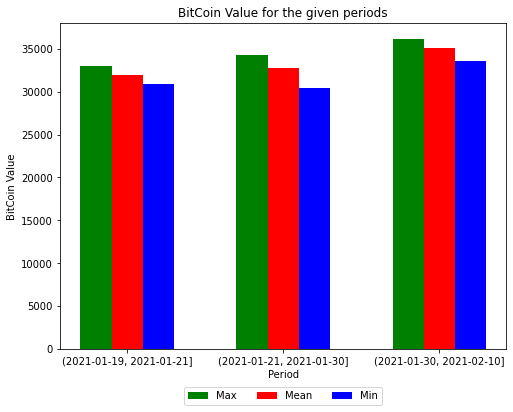

In [11]:
#Plotting the data using Matplotlib
from matplotlib.pyplot import figure
ind=np.arange(len(df2.index))
width=0.2
figure(figsize=(8,6))

plt.bar(ind-width,df2[('Value',  'max')],width,label='Max',color='g')
plt.bar(ind,df2[('Value', 'mean')],width,label='Mean',color='r')
plt.bar(ind+width,df2[('Value',  'min')],width,label='Min',color='b')

plt.title('BitCoin Value for the given periods')
plt.xlabel('Period')
plt.ylabel('BitCoin Value')
plt.xticks((0,1,2),df2.index)
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()
